doing linear regression for pacific dataset

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving pacific.csv to pacific.csv


In [ ]:
pacific = pd.read_csv("pacific.csv", index_col="Date")

In [ ]:
pacific

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,,,,,,,,,,,,,,,,,,,,,
19490611,EP011949,UNNAMED,0,,TS,20.2N,106.3W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
19490611,EP011949,UNNAMED,600,,TS,20.2N,106.4W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
19490611,EP011949,UNNAMED,1200,,TS,20.2N,106.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
19490611,EP011949,UNNAMED,1800,,TS,20.3N,107.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
19490612,EP011949,UNNAMED,0,,TS,20.4N,108.6W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151128,EP222015,SANDRA,1200,,LO,21.7N,109.0W,35,1002,60,...,0,0,0,0,0,0,0,0,0,0
20151128,EP222015,SANDRA,1800,,LO,22.4N,108.7W,30,1007,0,...,0,0,0,0,0,0,0,0,0,0
20151129,EP222015,SANDRA,0,,LO,23.1N,108.3W,30,1008,0,...,0,0,0,0,0,0,0,0,0,0


checking for coloumns with missing values for data preprocessing

In [ ]:
null_coloumns = pacific.apply(pd.isnull).sum()/pacific.shape[0]
null_coloumns

,0
ID,0.0
Name,0.0
Time,0.0
Event,0.0
Status,0.0
Latitude,0.0
Longitude,0.0
Maximum Wind,0.0
Minimum Pressure,0.0
Low Wind NE,0.0


In [ ]:
pacific.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26137 entries, 19490611 to 20151129
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Time              26137 non-null  int64 
 3   Event             26137 non-null  object
 4   Status            26137 non-null  object
 5   Latitude          26137 non-null  object
 6   Longitude         26137 non-null  object
 7   Maximum Wind      26137 non-null  int64 
 8   Minimum Pressure  26137 non-null  int64 
 9   Low Wind NE       26137 non-null  int64 
 10  Low Wind SE       26137 non-null  int64 
 11  Low Wind SW       26137 non-null  int64 
 12  Low Wind NW       26137 non-null  int64 
 13  Moderate Wind NE  26137 non-null  int64 
 14  Moderate Wind SE  26137 non-null  int64 
 15  Moderate Wind SW  26137 non-null  int64 
 16  Moderate Wind NW  26137 non-null  int64 
 17  High Wi

In [ ]:
pacific.describe()

,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,896.050427,48.949344,507.566591,9.813292,8.566018,6.587214,8.557600,3.273520,2.783219,2.176225,2.775185,1.293760,1.090982,0.831197,1.103608
std,672.008065,25.334450,497.573524,29.605022,26.435236,21.254314,27.588431,12.897517,11.328666,9.450316,11.375292,6.394904,5.578747,4.643584,5.694738
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600.000000,45.000000,941.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1200.000000,65.000000,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


### Checking the data types of each coloumn to ensure its correctly labelled

In [ ]:
pacific.dtypes

,0
ID,object
Name,object
Time,int64
Event,object
Status,object
Latitude,object
Longitude,object
Maximum Wind,int64
Minimum Pressure,int64
Low Wind NE,int64


In [ ]:
pacific.index

Index([19490611, 19490611, 19490611, 19490611, 19490612, 19490612, 19490612,
       19490617, 19490617, 19490618,
       ...
       20151127, 20151127, 20151127, 20151128, 20151128, 20151128, 20151128,
       20151129, 20151129, 20151129],
      dtype='int64', name='Date', length=26137)

Changing the undex date to date time format to easily acess data based on the years

In [ ]:
pacific.index = pd.to_datetime(pacific.index)

In [ ]:
pacific.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970],
      dtype='int32', name='Date', length=26137)

In [ ]:
pacific.index.year.value_counts().sort_index()

,count
Date,
1970,26137


In [ ]:
pacific.index


DatetimeIndex(['1970-01-01 00:00:00.019490611',
               '1970-01-01 00:00:00.019490611',
               '1970-01-01 00:00:00.019490611',
               '1970-01-01 00:00:00.019490611',
               '1970-01-01 00:00:00.019490612',
               '1970-01-01 00:00:00.019490612',
               '1970-01-01 00:00:00.019490612',
               '1970-01-01 00:00:00.019490617',
               '1970-01-01 00:00:00.019490617',
               '1970-01-01 00:00:00.019490618',
               ...
               '1970-01-01 00:00:00.020151127',
               '1970-01-01 00:00:00.020151127',
               '1970-01-01 00:00:00.020151127',
               '1970-01-01 00:00:00.020151128',
               '1970-01-01 00:00:00.020151128',
               '1970-01-01 00:00:00.020151128',
               '1970-01-01 00:00:00.020151128',
               '1970-01-01 00:00:00.020151129',
               '1970-01-01 00:00:00.020151129',
               '1970-01-01 00:00:00.020151129'],
              dtype=

In [ ]:
print(pacific.head())

                                     ID                 Name  Time Event  \
Date                                                                       
1970-01-01 00:00:00.019490611  EP011949              UNNAMED     0         
1970-01-01 00:00:00.019490611  EP011949              UNNAMED   600         
1970-01-01 00:00:00.019490611  EP011949              UNNAMED  1200         
1970-01-01 00:00:00.019490611  EP011949              UNNAMED  1800         
1970-01-01 00:00:00.019490612  EP011949              UNNAMED     0         

                              Status Latitude Longitude  Maximum Wind  \
Date                                                                    
1970-01-01 00:00:00.019490611     TS    20.2N    106.3W            45   
1970-01-01 00:00:00.019490611     TS    20.2N    106.4W            45   
1970-01-01 00:00:00.019490611     TS    20.2N    106.7W            45   
1970-01-01 00:00:00.019490611     TS    20.3N    107.7W            45   
1970-01-01 00:00:00.019490612

In [ ]:
pacific.tail()

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020151128,EP222015,SANDRA,1200,,LO,21.7N,109.0W,35,1002,60,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.020151128,EP222015,SANDRA,1800,,LO,22.4N,108.7W,30,1007,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.020151129,EP222015,SANDRA,0,,LO,23.1N,108.3W,30,1008,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.020151129,EP222015,SANDRA,600,,LO,23.5N,107.9W,25,1009,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.020151129,EP222015,SANDRA,1200,,LO,24.2N,107.7W,20,1010,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pacific = pd.read_csv("pacific.csv")
print(pacific['Date'].head())


0    19490611
1    19490611
2    19490611
3    19490611
4    19490612
Name: Date, dtype: int64


changing the date format to help in easier prediction model testing

In [ ]:
pacific['Date'] = pacific['Date'].astype(str)

In [ ]:
pacific['Date'] = pd.to_datetime(pacific['Date'], format='%Y%m%d')


pacific.set_index('Date', inplace=True)

In [ ]:
print(pacific.head())

                  ID                 Name  Time Event Status Latitude  \
Date                                                                    
1949-06-11  EP011949              UNNAMED     0           TS    20.2N   
1949-06-11  EP011949              UNNAMED   600           TS    20.2N   
1949-06-11  EP011949              UNNAMED  1200           TS    20.2N   
1949-06-11  EP011949              UNNAMED  1800           TS    20.3N   
1949-06-12  EP011949              UNNAMED     0           TS    20.4N   

           Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  ...  \
Date                                                               ...   
1949-06-11    106.3W            45                 0            0  ...   
1949-06-11    106.4W            45                 0            0  ...   
1949-06-11    106.7W            45                 0            0  ...   
1949-06-11    107.7W            45                 0            0  ...   
1949-06-12    108.6W            45          

In [ ]:
print(pacific.tail())

                  ID                 Name  Time Event Status Latitude  \
Date                                                                    
2015-11-28  EP222015               SANDRA  1200           LO    21.7N   
2015-11-28  EP222015               SANDRA  1800           LO    22.4N   
2015-11-29  EP222015               SANDRA     0           LO    23.1N   
2015-11-29  EP222015               SANDRA   600           LO    23.5N   
2015-11-29  EP222015               SANDRA  1200           LO    24.2N   

           Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  ...  \
Date                                                               ...   
2015-11-28    109.0W            35              1002           60  ...   
2015-11-28    108.7W            30              1007            0  ...   
2015-11-29    108.3W            30              1008            0  ...   
2015-11-29    107.9W            25              1009            0  ...   
2015-11-29    107.7W            20          

In [ ]:
print(pacific.index.year.value_counts().sort_index())

Date
1949     82
1950    117
1951    131
1952     95
1953     52
       ... 
2011    411
2012    500
2013    568
2014    840
2015    717
Name: count, Length: 67, dtype: int64


In [ ]:
pacific.index

DatetimeIndex(['1949-06-11', '1949-06-11', '1949-06-11', '1949-06-11',
               '1949-06-12', '1949-06-12', '1949-06-12', '1949-06-17',
               '1949-06-17', '1949-06-18',
               ...
               '2015-11-27', '2015-11-27', '2015-11-27', '2015-11-28',
               '2015-11-28', '2015-11-28', '2015-11-28', '2015-11-29',
               '2015-11-29', '2015-11-29'],
              dtype='datetime64[ns]', name='Date', length=26137, freq=None)

In [ ]:
pacific.head()

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,,,,,,,,,,,,,,,,,,,,,
1949-06-11,EP011949,UNNAMED,0,,TS,20.2N,106.3W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-06-11,EP011949,UNNAMED,600,,TS,20.2N,106.4W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-06-11,EP011949,UNNAMED,1200,,TS,20.2N,106.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-06-11,EP011949,UNNAMED,1800,,TS,20.3N,107.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-06-12,EP011949,UNNAMED,0,,TS,20.4N,108.6W,45,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a target coloumn that stores value of maximum wind and minimum pressure to predict the huricane possibility

Key Relationships:

High Winds + Low Pressure: This is the signature of a strong, intensifying hurricane.
Low Winds + Low Pressure: This could indicate a tropical depression or storm that hasn’t reached hurricane strength.
High Winds + High Pressure: This combination is uncommon in hurricanes because high pressure typically suppresses storm formation by preventing the updrafts necessary for cyclonic activity.
Low Winds + High Pressure: This condition usually indicates calm weather, as high pressure tends to stabilize the atmospher

In [ ]:
pacific["target"] = pacific[["Maximum Wind", "Minimum Pressure"]].apply(tuple, axis=1)


In [ ]:
pacific['target'] = pacific['target'].bfill()

In [ ]:
pacific

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,target
Date,,,,,,,,,,,,,,,,,,,,,
1949-06-11,EP011949,UNNAMED,0,,TS,20.2N,106.3W,45,0,0,...,0,0,0,0,0,0,0,0,0,"(45, 0)"
1949-06-11,EP011949,UNNAMED,600,,TS,20.2N,106.4W,45,0,0,...,0,0,0,0,0,0,0,0,0,"(45, 0)"
1949-06-11,EP011949,UNNAMED,1200,,TS,20.2N,106.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,"(45, 0)"
1949-06-11,EP011949,UNNAMED,1800,,TS,20.3N,107.7W,45,0,0,...,0,0,0,0,0,0,0,0,0,"(45, 0)"
1949-06-12,EP011949,UNNAMED,0,,TS,20.4N,108.6W,45,0,0,...,0,0,0,0,0,0,0,0,0,"(45, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-28,EP222015,SANDRA,1200,,LO,21.7N,109.0W,35,1002,60,...,0,0,0,0,0,0,0,0,0,"(35, 1002)"
2015-11-28,EP222015,SANDRA,1800,,LO,22.4N,108.7W,30,1007,0,...,0,0,0,0,0,0,0,0,0,"(30, 1007)"
2015-11-29,EP222015,SANDRA,0,,LO,23.1N,108.3W,30,1008,0,...,0,0,0,0,0,0,0,0,0,"(30, 1008)"


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Assigning features and target
X = pacific[['Minimum Pressure']].values  # Minimum Pressure as feature
y = pacific['Maximum Wind'].values        # Target is Maximum Wind

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
intercept = lin_reg.intercept_
coef = lin_reg.coef_  #learning parameters

In [ ]:
preds = lin_reg.predict(X)
Score_Lin_Reg = lin_reg.score(X, y)
individual_errors = y - preds

print("Linear Regression Score (R^2):", Score_Lin_Reg)
print("Intercept:", intercept)
print("Coefficient:", coef)
print("Mean Squared Error:", mean_squared_error(y, preds))


Linear Regression Score (R^2): 0.0027135141849548017
Intercept: 50.295555340485386
Coefficient: [-0.00265229]
Mean Squared Error: 640.0682472016902


In [ ]:
comparison_df = pd.DataFrame({
    'Actual Maximum Wind': y,
    'Predicted Maximum Wind': preds,
    'Error': individual_errors
})

print(comparison_df)


       Actual Maximum Wind  Predicted Maximum Wind      Error
0                       45               50.295555  -5.295555
1                       45               50.295555  -5.295555
2                       45               50.295555  -5.295555
3                       45               50.295555  -5.295555
4                       45               50.295555  -5.295555
...                    ...                     ...        ...
26132                   35               47.637965 -12.637965
26133                   30               47.624704 -17.624704
26134                   30               47.622052 -17.622052
26135                   25               47.619399 -22.619399
26136                   20               47.616747 -27.616747

[26137 rows x 3 columns]


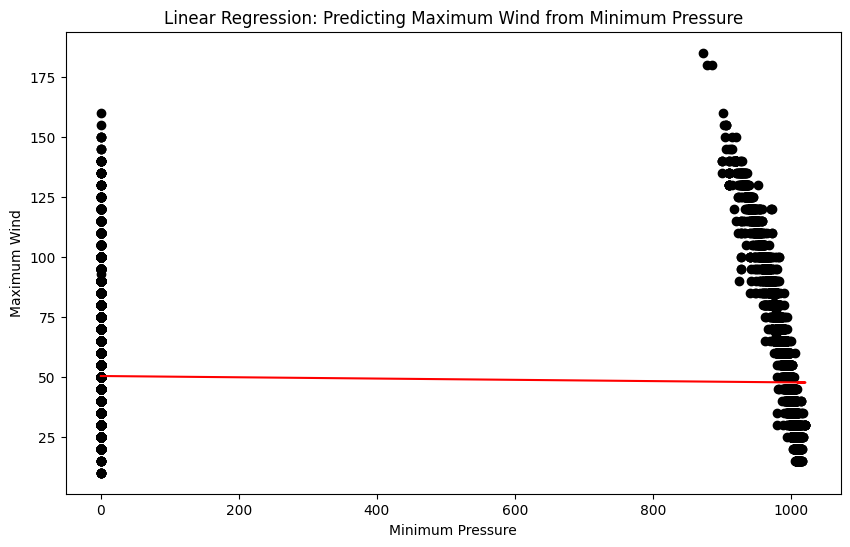

In [ ]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Actual Maximum Wind')
plt.plot(X, preds, color='red', label='Predicted Maximum Wind')
plt.xlabel("Minimum Pressure")
plt.ylabel("Maximum Wind")
plt.title("Linear Regression: Predicting Maximum Wind from Minimum Pressure")
plt.show()

doing linear regression for atlantic data set

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving atlantic.csv to atlantic.csv


In [2]:
atlantic = pd.read_csv("atlantic.csv", index_col="Date")

In [3]:
atlantic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49105 entries, 18510625 to 20151113
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Time              49105 non-null  int64 
 3   Event             49105 non-null  object
 4   Status            49105 non-null  object
 5   Latitude          49105 non-null  object
 6   Longitude         49105 non-null  object
 7   Maximum Wind      49105 non-null  int64 
 8   Minimum Pressure  49105 non-null  int64 
 9   Low Wind NE       49105 non-null  int64 
 10  Low Wind SE       49105 non-null  int64 
 11  Low Wind SW       49105 non-null  int64 
 12  Low Wind NW       49105 non-null  int64 
 13  Moderate Wind NE  49105 non-null  int64 
 14  Moderate Wind SE  49105 non-null  int64 
 15  Moderate Wind SW  49105 non-null  int64 
 16  Moderate Wind NW  49105 non-null  int64 
 17  High Wi

In [5]:
at_null_coloumns = atlantic.apply(pd.isnull).sum()/atlantic.shape[0]
at_null_coloumns

,0
ID,0.0
Name,0.0
Time,0.0
Event,0.0
Status,0.0
Latitude,0.0
Longitude,0.0
Maximum Wind,0.0
Minimum Pressure,0.0
Low Wind NE,0.0


Checking the data types of each coloumn to ensure its correctly labelled

In [6]:
atlantic.dtypes

,0
ID,object
Name,object
Time,int64
Event,object
Status,object
Latitude,object
Longitude,object
Maximum Wind,int64
Minimum Pressure,int64
Low Wind NE,int64


In [7]:
atlantic.index

Index([18510625, 18510625, 18510625, 18510625, 18510625, 18510626, 18510626,
       18510626, 18510626, 18510627,
       ...
       20151111, 20151111, 20151111, 20151112, 20151112, 20151112, 20151112,
       20151113, 20151113, 20151113],
      dtype='int64', name='Date', length=49105)

In [8]:
atlantic.index = pd.to_datetime(atlantic.index)

In [14]:
atlantic.index

DatetimeIndex(['1970-01-01 00:00:00.018510625',
               '1970-01-01 00:00:00.018510625',
               '1970-01-01 00:00:00.018510625',
               '1970-01-01 00:00:00.018510625',
               '1970-01-01 00:00:00.018510625',
               '1970-01-01 00:00:00.018510626',
               '1970-01-01 00:00:00.018510626',
               '1970-01-01 00:00:00.018510626',
               '1970-01-01 00:00:00.018510626',
               '1970-01-01 00:00:00.018510627',
               ...
               '1970-01-01 00:00:00.020151111',
               '1970-01-01 00:00:00.020151111',
               '1970-01-01 00:00:00.020151111',
               '1970-01-01 00:00:00.020151112',
               '1970-01-01 00:00:00.020151112',
               '1970-01-01 00:00:00.020151112',
               '1970-01-01 00:00:00.020151112',
               '1970-01-01 00:00:00.020151113',
               '1970-01-01 00:00:00.020151113',
               '1970-01-01 00:00:00.020151113'],
              dtype=

In [15]:
print(atlantic.head())
print(atlantic.tail())

                                     ID                 Name  Time Event  \
Date                                                                       
1970-01-01 00:00:00.018510625  AL011851              UNNAMED     0         
1970-01-01 00:00:00.018510625  AL011851              UNNAMED   600         
1970-01-01 00:00:00.018510625  AL011851              UNNAMED  1200         
1970-01-01 00:00:00.018510625  AL011851              UNNAMED  1800         
1970-01-01 00:00:00.018510625  AL011851              UNNAMED  2100     L   

                              Status Latitude Longitude  Maximum Wind  \
Date                                                                    
1970-01-01 00:00:00.018510625     HU    28.0N     94.8W            80   
1970-01-01 00:00:00.018510625     HU    28.0N     95.4W            80   
1970-01-01 00:00:00.018510625     HU    28.0N     96.0W            80   
1970-01-01 00:00:00.018510625     HU    28.1N     96.5W            80   
1970-01-01 00:00:00.018510625

Creating a target coloumn that stores value of maximum wind and minimum pressure to predict the huricane possibility

Key Relationships:

High Winds + Low Pressure: This is the signature of a strong, intensifying hurricane. Low Winds + Low Pressure: This could indicate a tropical depression or storm that hasn’t reached hurricane strength. High Winds + High Pressure: This combination is uncommon in hurricanes because high pressure typically suppresses storm formation by preventing the updrafts necessary for cyclonic activity. Low Winds + High Pressure: This condition usually indicates calm weather, as high pressure tends to stabilize the atmospher

In [16]:
atlantic["target"] = atlantic[["Maximum Wind", "Minimum Pressure"]].apply(tuple, axis=1)


In [17]:
atlantic

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,target
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.018510625,AL011851,UNNAMED,0,,HU,28.0N,94.8W,80,0,0,...,0,0,0,0,0,0,0,0,0,"(80, 0)"
1970-01-01 00:00:00.018510625,AL011851,UNNAMED,600,,HU,28.0N,95.4W,80,0,0,...,0,0,0,0,0,0,0,0,0,"(80, 0)"
1970-01-01 00:00:00.018510625,AL011851,UNNAMED,1200,,HU,28.0N,96.0W,80,0,0,...,0,0,0,0,0,0,0,0,0,"(80, 0)"
1970-01-01 00:00:00.018510625,AL011851,UNNAMED,1800,,HU,28.1N,96.5W,80,0,0,...,0,0,0,0,0,0,0,0,0,"(80, 0)"
1970-01-01 00:00:00.018510625,AL011851,UNNAMED,2100,L,HU,28.2N,96.8W,80,0,0,...,0,0,0,0,0,0,0,0,0,"(80, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020151112,AL122015,KATE,1200,,EX,41.3N,50.4W,55,981,220,...,120,120,120,60,0,0,0,0,0,"(55, 981)"
1970-01-01 00:00:00.020151112,AL122015,KATE,1800,,EX,41.9N,49.9W,55,983,220,...,120,120,120,60,0,0,0,0,0,"(55, 983)"
1970-01-01 00:00:00.020151113,AL122015,KATE,0,,EX,41.5N,49.2W,50,985,540,...,220,120,120,60,0,0,0,0,0,"(50, 985)"


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
# Assigning features and target
X = atlantic[['Minimum Pressure']].values  # Minimum Pressure as feature
y = atlantic['Maximum Wind'].values        # Target is Maximum Wind

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [21]:
intercept = lin_reg.intercept_
coef = lin_reg.coef_  #learning parameters

In [22]:
preds = lin_reg.predict(X)
Score_Lin_Reg = lin_reg.score(X, y)
individual_errors = y - preds

print("Linear Regression Score (R^2):", Score_Lin_Reg)
print("Intercept:", intercept)
print("Coefficient:", coef)
print("Mean Squared Error:", mean_squared_error(y, preds))

Linear Regression Score (R^2): 1.3113275888154696e-05
Intercept: 51.92739459193165
Coefficient: [0.00020857]
Mean Squared Error: 766.2620365261442


In [23]:
comparison_df = pd.DataFrame({
    'Actual Maximum Wind': y,
    'Predicted Maximum Wind': preds,
    'Error': individual_errors
})

print(comparison_df)

       Actual Maximum Wind  Predicted Maximum Wind      Error
0                       80               51.927395  28.072605
1                       80               51.927395  28.072605
2                       80               51.927395  28.072605
3                       80               51.927395  28.072605
4                       80               51.927395  28.072605
...                    ...                     ...        ...
49100                   55               52.131997   2.868003
49101                   55               52.132414   2.867586
49102                   50               52.132831  -2.132831
49103                   45               52.132831  -7.132831
49104                   45               52.133249  -7.133249

[49105 rows x 3 columns]


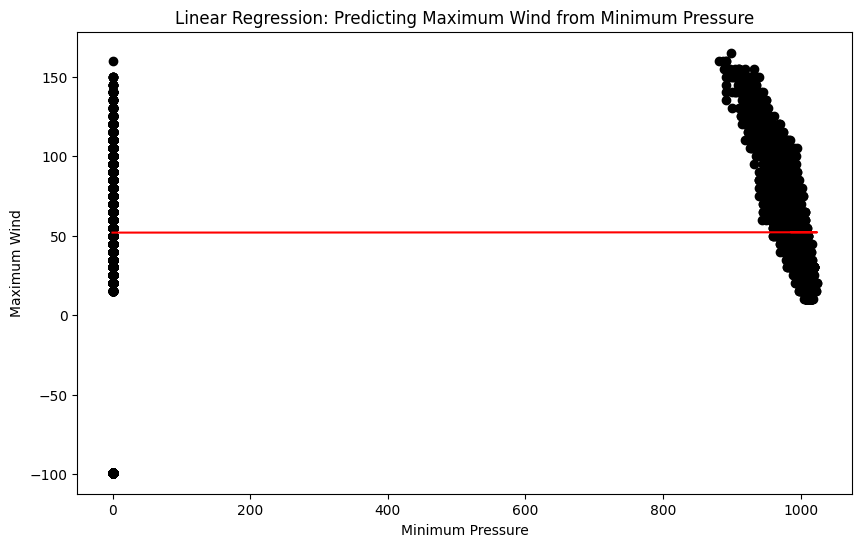

In [24]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Actual Maximum Wind')
plt.plot(X, preds, color='red', label='Predicted Maximum Wind')
plt.xlabel("Minimum Pressure")
plt.ylabel("Maximum Wind")
plt.title("Linear Regression: Predicting Maximum Wind from Minimum Pressure")
plt.show()